# Using the polygon package for IML in place of PROC GINSIDE for calculating point intersection with multiple overlapping polygons

## General

This notebook utilizes the polygon package for IML created by Rick Wicklin in order determine whether any of a set of points are inside a set of non-simple (intersecting) polygons.  In this example we have two overlapping shapes and five points.

## See Also
* [Inspiration for creating this](https://communities.sas.com/t5/Graphics-Programming/Proc-Ginside-with-Shapefile-that-has-multiple-overlapping/m-p/564243/highlight/true#M18262)
* [The polygon package](https://communities.sas.com/t5/SAS-IML-File-Exchange/The-polygon-Package/ta-p/263210)

## Step 1

First, we need to get the polygon package into SAS.  One way to do this with code it to run the following, which downloads the zip file from the SAS/IML File Exchange and installs it.  Once installed, the package is available in future sessions.  No need to install every time you want to use it.

In [3]:
filename polygon "%sysfunc(pathname(work,l))/polygon.zip";

proc http 
  url="https://communities.sas.com/kntur85557/attachments/kntur85557/sas_iml%40tkb/30/1/polygon.zip" 
  out=polygon;
run;

proc iml;
  package install polygon;
quit;

## Step 2

Here, we define the polygons and points as SAS data sets

In [48]:
data shapes;
input Sx Sy id;
cards;
1   1 1
2   1 1
4   2 1
3   2 1
2.2 1 2
3   1 2
3   2 2
3   3 2
2.8 3 2
;
run;

data points;
input Px Py id;
cards;
1.5  1.25 1
2    3    2
2.5  1.5  3
2.75 2.5  4
3.2  1.75 5
;
run;

## Step 3

Because life is better with pictures, here is a plot of the polygons and points.  We can see that we have points that fall under various conditions: boundary, outside all polygons, inside all polygons and inside a single polygon


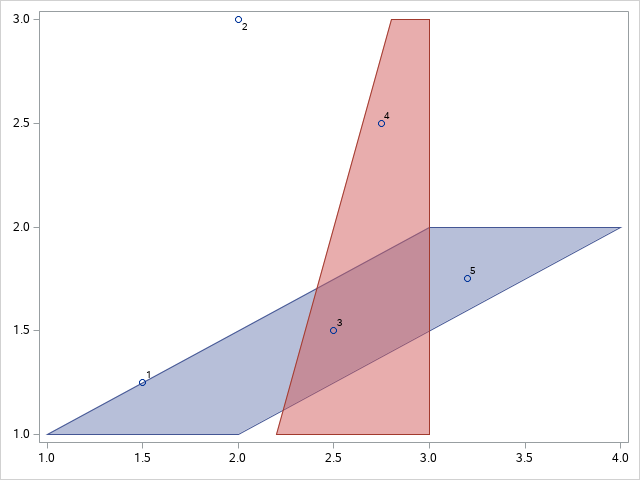

In [55]:
data plot;
set shapes points;
run;

proc sgplot data=plot noautolegend;
  xaxis display=(nolabel);
  yaxis display=(nolabel);
  
  polygon x=Sx y=Sy id=id / group=id fill outline fillattrs=(transparency=0.5);
  scatter x=Px y=Py       / datalabel=id;
run;

## Step 4

The format PtInside provides a character string definition for the output created by the PolyPtInside function in the polygon package
<p>
We then load the previously created data into IML and call the function PolyPtInside, which does all the hard work for us, apply the formats and write the output to a new SAS data set, work.points_inside


In [56]:
proc format;
  value PtInside
   . = 'boundary'
   1 = 'inside'
   0 = 'outside';
run;

proc iml;
  package load polygon;
  
  use work.shapes;
  read all into shapes;
  close work.shapes;
  
  use work.points;
  read all into points;
  close work.points;
  
  inside = PolyPtInside(shapes, points);
  
  id = points[,3];
  Px  = points[,1];
  Py  = points[,2];
  S1 = inside[,1];
  mattrib s1 format=PtInside.;
  S2 = inside[,2];
  mattrib s2 format=PtInside.;
  
  create work.points_inside var {"ID", "Px", "Py", "s1", "s2"};
  append;
  close work.points_inside;  
quit;

## Step 5

Let's print the output from the previous step.  Below we can see that we calculated our expected results easily visualized in step 3

In [54]:
proc print data=points_inside;
title;
run;

Obs,ID,Px,Py,s1,s2
1,1,1.50,1.25,boundary,outside
2,2,2.00,3.00,outside,outside
3,3,2.50,1.50,inside,inside
4,4,2.75,2.50,outside,inside
5,5,3.20,1.75,inside,outside
